In [1]:
import pandas as pd

In [2]:
# Load the dataset from the provided data
data = pd.read_csv('/content/sales_data_1.csv')

In [5]:
# Convert the 'date' column to a datetime object for date-related operations
data['Date'] = pd.to_datetime(data['Date'])

In [6]:
# Calculate the total revenue and total cost
data['Revenue'] = data['Selling price'] * data['Quantity sold']
data['Cost'] = data['Buying price'] * data['Quantity sold']

In [7]:
# Calculate gross margin
total_revenue = data['Revenue'].sum()
total_cost = data['Cost'].sum()
gross_margin = ((total_revenue - total_cost) / total_revenue) * 100

In [8]:
# Calculate profit for each vendor and customer
vendor_profit = data.groupby('Firm bought from')['Revenue'].sum() - data.groupby('Firm bought from')['Cost'].sum()
customer_profit = data.groupby('Customer')['Revenue'].sum() - data.groupby('Customer')['Cost'].sum()

In [10]:
# Calculate profit by day of the week
data['Day_of_Week'] = data['Date'].dt.day_name()
day_profit = data.groupby('Day_of_Week')['Revenue'].sum() - data.groupby('Day_of_Week')['Cost'].sum()

## Answers (1-5)

In [11]:
# Answers
print(f"1. Overall Gross Margin: {gross_margin:.2f}%")
print(f"2. Most Profitable Vendor: {vendor_profit.idxmax()}")
print(f"3. Least Profitable Customer: {customer_profit.idxmin()}")
print(f"4. Most Profitable Day of the Week: {day_profit.idxmax()}")
print(f"5. Least Profitable Day of the Week: {day_profit.idxmin()}")

1. Overall Gross Margin: 24.63%
2. Most Profitable Vendor: Vendor4
3. Least Profitable Customer: Customer3
4. Most Profitable Day of the Week: Monday
5. Least Profitable Day of the Week: Sunday


In [12]:
# Load the new dataset
data2 = pd.read_csv('/content/sales_data_2.csv')

In [13]:
# Convert the 'date' column to a datetime object for date-related operations
data2['Date'] = pd.to_datetime(data2['Date'])

In [15]:
# Calculate daily gross profit
data2['Revenue'] = data2['Selling price'] * data2['Quantity sold']
data2['Cost'] = data2['Buying price'] * data2['Quantity sold']
data2['Gross Profit'] = data2['Revenue'] - data2['Cost']

In [16]:
# Calculate a 3-day moving average of the daily gross profit
data2['3-Day Avg Gross Profit'] = data2['Gross Profit'].rolling(window=3).mean()

## 6. Calculate a 3-day average of the daily gross profit

In [18]:
three_day_avg = data2['3-Day Avg Gross Profit']
print(three_day_avg)

0            NaN
1            NaN
2     433.613333
3     177.266667
4     142.366667
         ...    
65    552.863333
66    552.070000
67    479.726667
68    386.093333
69    366.720000
Name: 3-Day Avg Gross Profit, Length: 70, dtype: float64


## 7. Analyze trends in the 3-day average gross profit

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
# Calculate daily gross profit
data2['Revenue'] = data2['Selling price'] * data2['Quantity sold']
data2['Cost'] = data2['Buying price'] * data2['Quantity sold']
data2['Gross Profit'] = data2['Revenue'] - data2['Cost']

In [24]:
# Calculate a 3-day moving average of the daily gross profit
data2['3-Day Avg Gross Profit'] = data2['Gross Profit'].rolling(window=3).mean()

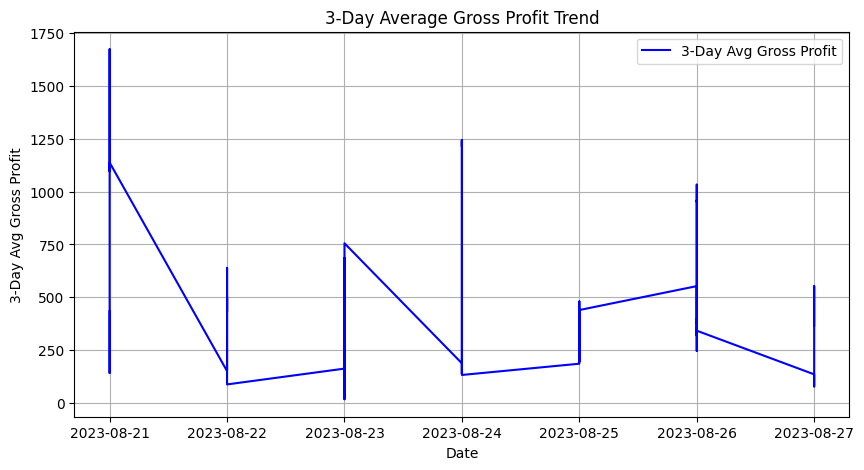

In [29]:
# Create a line plot for the 3-day average gross profit
plt.figure(figsize=(10, 5))
plt.plot(data2['Date'], data2['3-Day Avg Gross Profit'], label='3-Day Avg Gross Profit', color='blue')
plt.title('3-Day Average Gross Profit Trend')
plt.xlabel('Date')
plt.ylabel('3-Day Avg Gross Profit')
plt.grid(True)
plt.legend()
# Show the plot
plt.show()

## 8. Optimize the sales process

In [32]:
# Calculate vendor and customer profitability and make decisions based on profit analysis.
vendor_profit = data2.groupby('Firm bought from')['Gross Profit'].sum()
customer_profit = data2.groupby('Customer')['Gross Profit'].sum()
print("Vendor Profit")
print(vendor_profit)
print("Customer Profit")
print(customer_profit)

Vendor Profit
Firm bought from
Vendor1     1555.59
Vendor10    3040.62
Vendor2     1296.98
Vendor3     6370.67
Vendor4     6903.31
Vendor5     1616.14
Vendor6     1217.95
Vendor7     4961.05
Vendor8      253.74
Vendor9     4266.70
Name: Gross Profit, dtype: float64
Customer Profit
Customer
Customer1     5310.57
Customer10    3692.44
Customer2     4215.67
Customer3     1055.05
Customer4     3337.37
Customer5     1315.28
Customer6     1930.76
Customer7     2197.62
Customer8     6498.91
Customer9     1929.08
Name: Gross Profit, dtype: float64


In [35]:
# Determine vendors with consistently low profitability
low_profit_vendors = vendor_profit[vendor_profit < vendor_profit.mean()]

# Determine customers with low contribution to profit
low_profit_customers = customer_profit[customer_profit < customer_profit.mean()]

# Print the results
print("Vendors with Consistently Low Profitability:")
print(low_profit_vendors)

print("\nCustomers with Low Contribution to Profit:")
print(low_profit_customers)

Vendors with Consistently Low Profitability:
Firm bought from
Vendor1     1555.59
Vendor10    3040.62
Vendor2     1296.98
Vendor5     1616.14
Vendor6     1217.95
Vendor8      253.74
Name: Gross Profit, dtype: float64

Customers with Low Contribution to Profit:
Customer
Customer3    1055.05
Customer5    1315.28
Customer6    1930.76
Customer7    2197.62
Customer9    1929.08
Name: Gross Profit, dtype: float64


In [49]:
# Define criteria for optimization (e.g., a threshold for profitability)
vendor_optimization_threshold = -10000
customer_optimization_threshold = 5000

In [50]:
# Identify vendors to consider firing
low_profit_vendors = vendor_profit[vendor_profit < vendor_optimization_threshold]

# Identify customers to consider letting go
low_profit_customers = customer_profit[customer_profit < customer_optimization_threshold]

In [51]:
# Print the results
print("Vendors to Consider Firing:")
print(low_profit_vendors)

print("\nCustomers to Consider Letting Go:")
print(low_profit_customers)

Vendors to Consider Firing:
Series([], Name: Gross Profit, dtype: float64)

Customers to Consider Letting Go:
Customer
Customer10    3692.44
Customer2     4215.67
Customer3     1055.05
Customer4     3337.37
Customer5     1315.28
Customer6     1930.76
Customer7     2197.62
Customer9     1929.08
Name: Gross Profit, dtype: float64


## 9. Calculate percentiles for buying and selling prices

In [52]:
# Calculate percentiles for buying and selling prices
buying_percentiles = data2['Buying price'].describe(percentiles=[0.25, 0.5, 0.75]).loc[['25%', '50%', '75%']]
selling_percentiles = data2['Selling price'].describe(percentiles=[0.25, 0.5, 0.75]).loc[['25%', '50%', '75%']]

In [53]:
# Print the results
print("25th, 50th (Median), and 75th Percentiles for Buying Prices:")
print(buying_percentiles)

25th, 50th (Median), and 75th Percentiles for Buying Prices:
25%    29.90
50%    60.76
75%    78.32
Name: Buying price, dtype: float64


In [54]:
print("\n25th, 50th (Median), and 75th Percentiles for Selling Prices:")
print(selling_percentiles)


25th, 50th (Median), and 75th Percentiles for Selling Prices:
25%     38.9750
50%     78.9900
75%    103.3975
Name: Selling price, dtype: float64


## 6. Analyze price trends relative to percentiles

In [55]:
# Calculate the 25th and 75th percentiles for buying and selling prices
buying_percentiles = data2['Buying price'].describe(percentiles=[0.25, 0.75]).loc[['25%', '75%']]
selling_percentiles = data2['Selling price'].describe(percentiles=[0.25, 0.75]).loc[['25%', '75%']]

In [56]:
# Identify transactions where buying price is below the 25th percentile or above the 75th percentile
below_25th_buying = data2['Buying price'] < buying_percentiles['25%']
above_75th_buying = data2['Buying price'] > buying_percentiles['75%']

# Identify transactions where selling price is below the 25th percentile or above the 75th percentile
below_25th_selling = data2['Selling price'] < selling_percentiles['25%']
above_75th_selling = data2['Selling price'] > selling_percentiles['75%']

In [57]:
# Calculate the frequency of transactions falling below/above the percentiles
freq_below_25th_buying = below_25th_buying.sum()
freq_above_75th_buying = above_75th_buying.sum()

freq_below_25th_selling = below_25th_selling.sum()
freq_above_75th_selling = above_75th_selling.sum()

In [58]:
# Print the results
print("Frequency of Buying Prices Below 25th Percentile:", freq_below_25th_buying)
print("Frequency of Buying Prices Above 75th Percentile:", freq_above_75th_buying)

print("\nFrequency of Selling Prices Below 25th Percentile:", freq_below_25th_selling)
print("Frequency of Selling Prices Above 75th Percentile:", freq_above_75th_selling)

Frequency of Buying Prices Below 25th Percentile: 18
Frequency of Buying Prices Above 75th Percentile: 18

Frequency of Selling Prices Below 25th Percentile: 18
Frequency of Selling Prices Above 75th Percentile: 18


### 11. Impact on Optimal Gross Margin from Honoring Vendor 4

In [59]:
# Calculate the impact on gross margin from honoring Vendor 4
# Calculate the original gross margin
original_gross_margin = data2['Gross Profit'].sum()

# Filter data to honor Vendor 4
vendor_4_data = data2[data2['Firm bought from'] == 'Vendor4']

# Calculate the new gross margin after honoring Vendor 4
new_gross_margin = original_gross_margin + vendor_4_data['Gross Profit'].sum()

# Calculate the impact on gross margin
impact_on_gross_margin = new_gross_margin - original_gross_margin

# Print the impact on gross margin
print("Impact on Gross Margin from Honoring Vendor 4:", impact_on_gross_margin)

Impact on Gross Margin from Honoring Vendor 4: 6903.309999999998


## 12. Identifying the Vendor for a Strategic Tie-Up

In [60]:
# Calculate the gross margin for each vendor
vendor_gross_margin = data2.groupby('Firm bought from')['Gross Profit'].sum()

# Identify the vendor with the highest gross margin
max_margin_vendor = vendor_gross_margin.idxmax()

# Calculate the theoretical maximum margin from that vendor
theoretical_max_margin = vendor_gross_margin[max_margin_vendor]

# Print the vendor with the highest margin and the theoretical maximum margin
print("Vendor for Strategic Tie-Up:", max_margin_vendor)
print("Theoretical Maximum Margin from that Vendor:", theoretical_max_margin)

Vendor for Strategic Tie-Up: Vendor4
Theoretical Maximum Margin from that Vendor: 6903.31


## 13. Price Elasticity of Sapota

In [61]:
import statsmodels.api as sm

# Assuming 'data2' is your dataset
X = data2[['Buying price', 'Selling price']]
X = sm.add_constant(X)  # Add a constant (intercept) term
y = data2['Quantity sold']

model = sm.OLS(y, X).fit()  # Fit a linear regression model
price_elasticity = model.params['Selling price']  # The coefficient for Selling price

# Print the price elasticity
print("Price Elasticity of Sapota:", price_elasticity)

Price Elasticity of Sapota: 0.5663090598121112
